## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("train_data.csv")
valid_data = pd.read_csv("valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(534, 2)


Date  count
0  2012-08-25      3
1  2012-08-26      3
2  2012-08-27      2
3  2012-08-28      2
4  2012-08-29      2

In [4]:
print(valid_data.shape)
valid_data.head()

(229, 2)


Date  count
0  2014-02-09    196
1  2014-02-10    299
2  2014-02-11    224
3  2014-02-12    216
4  2014-02-13    212

# Required Preprocessing 

In [5]:
train_data["Date"] = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')


In [6]:
valid_data["Date"] = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')


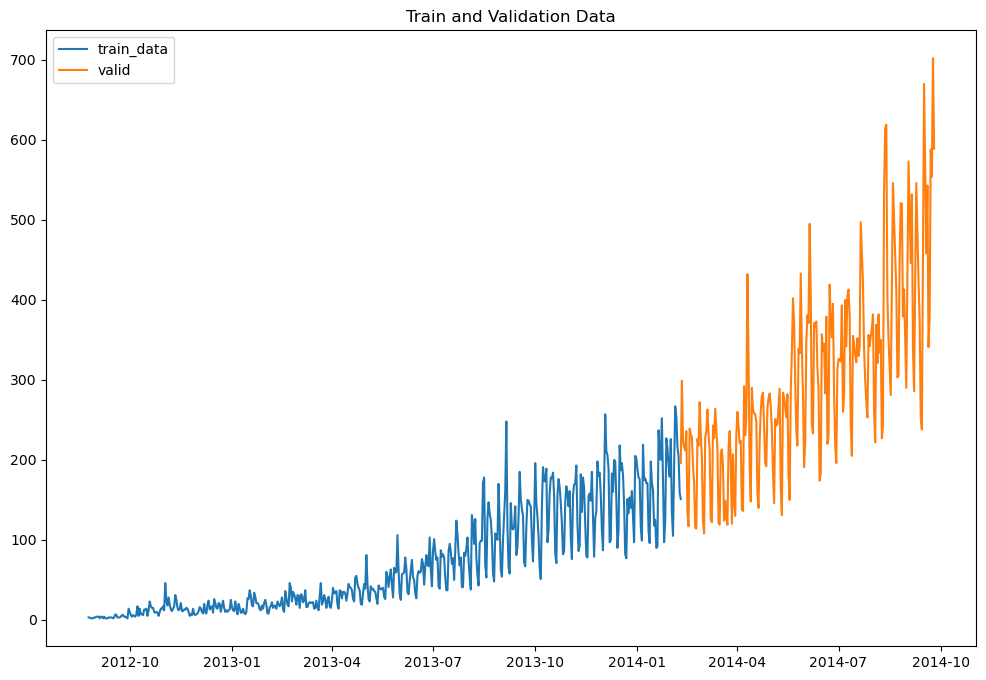

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Moving Average

We have a straight line here because same average value is predicted for all future points. We can change the 'last 7 days' value for each data point.

<img src = '3hotmk.webp'>

In [8]:
train_data.tail(7)

Date  count
527 2014-02-03    191
528 2014-02-04    267
529 2014-02-05    254
530 2014-02-06    216
531 2014-02-07    205
532 2014-02-08    159
533 2014-02-09    151

In [40]:
values_229=[i for i in train_data["count"].tail(229).values]

In [41]:
# list holding last seven values

valid_data['moving_average'] = 0


In [42]:
for i in range(0,len(valid_data)):
    end = len(values_229)
    start = len(values_229)-229
    pred = mean(values_229[start:end])
    
    valid_data['moving_average'][i] = pred
    week_values.append(pred)

In [43]:
valid_data.head(50)

Date  count  moving_average  weighted_moving_average
0  2014-02-09    196             129               192.392857
1  2014-02-10    299             129               188.955357
2  2014-02-11    224             129               184.608737
3  2014-02-12    216             129               181.962771
4  2014-02-13    212             129               181.133573
5  2014-02-14    236             129               181.312690
6  2014-02-15    134             129               182.388959
7  2014-02-16    117             129               182.937414
8  2014-02-17    239             129               182.501948
9  2014-02-18    232             129               182.295310
10 2014-02-19    229             129               182.267491
11 2014-02-20    193             129               182.315340
12 2014-02-21    171             129               182.364268
13 2014-02-22    115             129               182.383223
14 2014-02-23    114             129               182.369360
15 2014-02-24    226             129               182.352236
16 2014-02-25    218             129               182.351118
17 2014-02-26    272             129               182.355068
18 2014-02-27    231             129               182.358012
19 2014-02-28    204             129               182.358565
20 2014-03-01    122             129               182.357732
21 2014-03-02    108             129               182.356894
22 2014-03-03    228             129               182.356757
23 2014-03-04    236             129               182.357031
24 2014-03-05    263             129               182.357212
25 2014-03-06    232             129               182.357228
26 2014-03-07    212             129               182.357170
27 2014-03-08    126             129               182.357126
28 2014-03-09    122             129               182.357121
29 2014-03-10    243             129               182.357137
30 2014-03-11    227             129               182.357148
31 2014-03-12    264             129               182.357148
32 2014-03-13    239             129               182.357144
33 2014-03-14    213             129               182.357142
34 2014-03-15    121             129               182.357142
35 2014-03-16    119             129               182.357143
36 2014-03-17    209             129               182.357143
37 2014-03-18    213             129               182.357143
38 2014-03-19    192             129               182.357143
39 2014-03-20    124             129               182.357143
40 2014-03-21    149             129               182.357143
41 2014-03-22    129             129               182.357143
42 2014-03-23    119             129               182.357143
43 2014-03-24    214             129               182.357143
44 2014-03-25    236             129               182.357143
45 2014-03-26    198             129               182.357143
46 2014-03-27    120             129               182.357143
47 2014-03-28    207             129               182.357143
48 2014-03-29    145             129               182.357143
49 2014-03-30    130             129               182.357143

In [17]:
plt.figure(figsize=(12,4))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.plot(valid_data["Date"],valid_data['moving_average'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Method")
plt.show()

In [22]:
valid_data['moving_average'].head(25)

0     206.142857
1     208.306122
2     199.921283
3     192.195752
4     188.795145
5     186.480166
6     190.405904
7     196.035318
8     194.591384
9     192.632136
10    191.590829
11    191.504412
12    191.891450
13    192.664490
14    192.987146
15    192.551692
16    192.260308
17    192.207190
18    192.295241
19    192.408217
20    192.482040
21    192.455976
22    192.380095
23    192.355581
24    192.369191
Name: moving_average, dtype: float64

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
mean_absolute_error(valid_data['count'], valid_data['moving_average'])

123.46421602517908

In [23]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['moving_average']))
print('The RMSE value for Moving Approach is', rmse)

The RMSE value for Moving Approach is 160.75797988387004


# Weighted Moving Average
Move the window and assign weights to the values in this window. I am taking higher weights to recent observations. Weights can be assigned manually or using a function.

In [20]:
# list holding last seven values and weights

week_values = train_data['count'][527:534].values
week_values = week_values.tolist()

weights = []
for i in range(1,8):
    W = i/7
    weights.append(W)

In [21]:
weights

[0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857143,
 0.8571428571428571,
 1.0]

In [22]:
len(week_values), len(weights)

(7, 7)

In [23]:
valid_data['weighted_moving_average'] = 0

In [24]:
week_values

[191, 267, 254, 216, 205, 159, 151]

In [25]:
for i in range(0,len(valid_data)):
    
    end = len(week_values)
    start = len(week_values)-7
    
    final_values = week_values[start:end]
    
    weighted_mean = 0
    for j, k in zip(weights,final_values):
        weighted_mean += j*k
        
    weighted_mean = weighted_mean/sum(weights)
        
    valid_data['weighted_moving_average'][i] = weighted_mean
    week_values.append(weighted_mean)

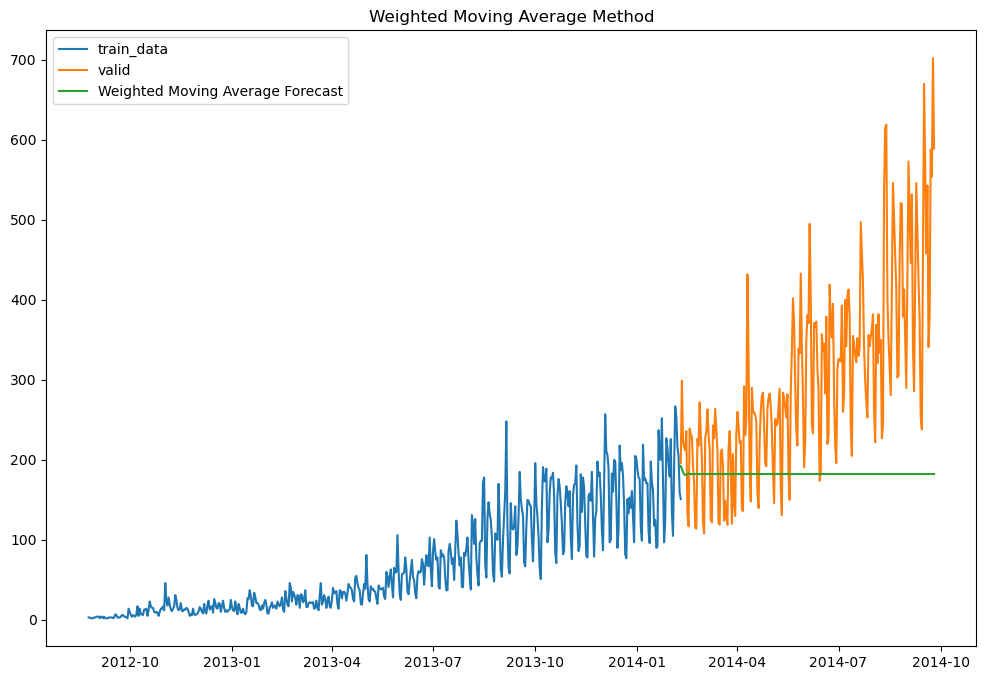

In [36]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.plot(valid_data["Date"],valid_data['weighted_moving_average'], label='Weighted Moving Average Forecast')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [26]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['weighted_moving_average']))
print('The RMSE value for Weighted Moving Approach is', rmse)

The RMSE value for Weighted Moving Approach is 167.7439710784862


In [27]:
mean_absolute_error(valid_data['count'], valid_data['weighted_moving_average'])

130.76603826463796

In [28]:
valid_data.head(7)

Date  count  moving_average  weighted_moving_average
0 2014-02-09    196      206.142857               192.392857
1 2014-02-10    299      208.306122               188.955357
2 2014-02-11    224      199.921283               184.608737
3 2014-02-12    216      192.195752               181.962771
4 2014-02-13    212      188.795145               181.133573
5 2014-02-14    236      186.480166               181.312690
6 2014-02-15    134      190.405904               182.388959